<a href="https://colab.research.google.com/github/Hyro9533/sharing-code/blob/main/TP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TP Outils Logiciels 2**

*Intégration Numérique*

---

Edité par MONTGUILLON Jonathan TP4.

<img src = "http://www.stillincontact.com/images/ecoles/10792.jpg">

I. **Préparation du Projet**

```markdown
>> Importations de librairies communes au projet.
```

In [53]:
#Installation d'une librairie d'affichage en couleur au niveau du terminal.
!pip install colorama
import colorama
from colorama import init, Fore, Back, Style

''' 
Fore: BLACK, RED, GREEN, YELLOW, BLUE, MAGENTA, CYAN, WHITE, RESET.
Back: BLACK, RED, GREEN, YELLOW, BLUE, MAGENTA, CYAN, WHITE, RESET.
Style: DIM, NORMAL, BRIGHT, RESET_ALL
'''

#Installation de librairies mathématiques

from scipy.integrate import quad 	

import numpy as np
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


```markdown
>> Définitions de fonctions communes au projet, non essentiel aux exercices demandés.
```

In [54]:
#Déifiniton de plusieurs fonctions qui permettent une optimisation du projet.

def errorCalcul(origin,calculate):
    return abs((origin - calculate)/(origin)) * 100

def jumpPrinter(loop,reset):
    if reset:
        resetPrinter()
    for k in range(loop):
        print("\n")
    return 

def resetPrinter():
    return print(Style.RESET_ALL)

def isfloat(value): 
    try: 
        float(value) 
        return True 
    except ValueError: 
        return False

```markdown
>> Définitions des fonctions mathématiques demandées dans les exercices.
```
$$
F = \int_a^b \frac{1}{x} \;dx
$$

$$
G = 30*\int_a^b |sin(x)| \;dx
$$

In [107]:
def functionOriginal(x):
    return 1/x

def functionOriginalPrinter():
    return "1/x"

def functionSecond(x):
    return 30*abs(np.sin(x))

def functionSecondPrinter():
    return "30.abs(sin(x))"

resetPrinter()
print(Back.GREEN + Fore.BLACK +"Tous les calculs seront arrondies à 10**-4.")
resetPrinter()



Tous les calculs seront arrondies à 10**-4.



```markdown
>> Définitions d'une fonction pour les bornes d'intégrations. (BORNES QUI NE SERONT QUE DES NOMBRES ENTIERS)
```

In [66]:
borneA = 'IS NOT DEFINED --> Run "QueryTerminal" Build-Function'
borneB = 'IS NOT DEFINED --> Run "QueryTerminal" Build-Function '

def queryTerminal():

    firstTerminal = 'IS NOT DEFINED'
    secondTerminal = 'IS NOT DEFINED'

    print(Back.RED + Fore.WHITE + "Merci d'entrer un entier positif ou négatif, pour les 2 variables suivantes !")
    jumpPrinter(1,True)
    print(Back.BLACK)

    
    while(firstTerminal.lstrip('-').isdigit() == False):
        firstTerminal = (input("- Entrez la borne 'a' : "))
    firstTerminal = int(firstTerminal)

    
    while(secondTerminal.lstrip('-').isdigit() == False):
        secondTerminal = (input("- Entrez la borne 'b' : ")) 
    secondTerminal = int(secondTerminal)

    jumpPrinter(2,True)
    print(Style.BRIGHT + Fore.YELLOW + "Les bornes sont respectivement : ",firstTerminal," & ",secondTerminal," .")
    resetPrinter()

    return firstTerminal,secondTerminal;

```markdown
>> Définitions d'une fonction pour le pas entre chaque forme.

Cette fonction peut s'effectuer par 2 méthodes :

> En déclarant le nombre de forme en entrée.

> En déclarant le pas directement en entrée.
```


In [67]:
nbrForme = 'IS NOT DEFINED --> Run "methodWithGeometryArg" Build-Function'
Δ = 'IS NOT DEFINED --> Run "methodWithGeometryArg" Build-Function '


def methodWithGeometryArg():

    if( (type(borneA) == str) & (type(borneB) == str) ):
        return print(Back.RED + Fore.WHITE + 'Veuillez déclarer des bornes d\' intégrations auparavant ! --> Run "QueryTerminal" Build-Function')
    else:
        print(Style.BRIGHT + Fore.YELLOW + "Déclaration avec les bornes suivantes : ", borneA, " & ", borneB)

    jumpPrinter(2,False)
    resetPrinter()

    print(Style.BRIGHT + "Vous pouvez déclarer le pas par 2 méthodes : \n\n- soit en déclarant le nombre de forme, \n\n- soit en déclarant le pas directement.\n\n\n Que préférez vous ?")
    print(Back.BLACK)

    choice = int(input("- Rentrez le chiffre correspondant :\n\nDéclaration de N (Nombre de forme) => 0.\n\nDéclaration de H (Pas) => 1.\n\n\n Choix : "))

    jumpPrinter(3,False)
    resetPrinter()

    formNumber = 'IS NOT DEFINED'
    stepBetweenForm = 'IS NOT DEFINED'

    if (choice == 0) : 
        #Calcull avec N

        print(Back.RED + Fore.WHITE + "Merci d'entrer un entier positif, pour l'unique variable suivante !")
        jumpPrinter(1,True)
        print(Back.BLACK)
    
        formNumber = 'a'
        while(formNumber.isdigit() == False):
            formNumber = (input("- Entrez le nombre de forme : "))
        formNumber = int(formNumber)

        stepBetweenForm = (borneB-borneA) / formNumber

    elif (choice == 1):
        #Calcul avec H

        print(Back.RED + Fore.WHITE + "Merci d'entrer un float ou entier positif, pour l'unique variable suivante !")
        jumpPrinter(1,True)
        print(Back.BLACK)

        stepBetweenForm = 'a'

        formNumber = 0.5


        while( (isfloat(stepBetweenForm) == False) or (float.is_integer(formNumber) == False ) ):
            stepBetweenForm = (input("- Entrez le pas : "))
          
            if(isfloat(stepBetweenForm)) :
                stepBetweenForm = float(stepBetweenForm)
                formNumber = (borneB-borneA) / stepBetweenForm

                if(float.is_integer(formNumber) == False):
                    resetPrinter()
                    print(Back.WHITE + Fore.RED +"Le nombre de forme à construire n'est pas un entier, le pas ne peut pas être validé => ",formNumber," . \n Veuillez à recommencer.")
                    jumpPrinter(1,True)


        formNumber = int(formNumber)
       

    jumpPrinter(2,True)
    print(Style.BRIGHT + Fore.YELLOW + "Le nombre de forme est de : ",formNumber," .")
    print(Style.BRIGHT + Fore.YELLOW + "Le pas est de : ",stepBetweenForm," .")



    return formNumber,stepBetweenForm;

**II. Exercice -  Intégration de la fonction inverse sur [1;4]**



```markdown
>> Déclarons en premier lieu les bornes.
>> Intégrons notre fonction, avec une fonction importé d'une librairie.
```

In [68]:
borneA,borneB = queryTerminal()

print(Style.BRIGHT + Fore.BLACK +"Fonction Entrée : ",functionOriginalPrinter(), " avec les bornes A et B respectivement : ",borneA, " & ",borneB)

functionIntegrate,calculError = quad(functionOriginal, borneA, borneB) 

jumpPrinter(1,True)
print(Fore.BLUE + "Fonction Intégrée : ", round(functionIntegrate,4))
resetPrinter()

Merci d'entrer un entier positif ou négatif, pour les 2 variables suivantes !




- Entrez la borne 'a' : 1
- Entrez la borne 'b' : 4





Les bornes sont respectivement :  1  &  4  .

Fonction Entrée :  1/x  avec les bornes A et B respectivement :  1  &  4



Fonction Intégrée :  1.3863



```markdown
>> Traçons sa représentation.
```

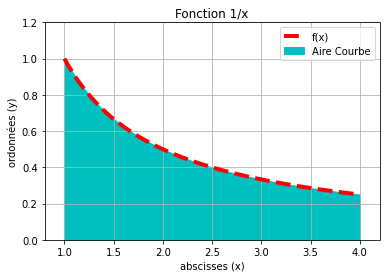

In [69]:
plt.grid()
plt.plot(np.linspace (borneA , borneB , 100) , functionOriginal(np.linspace (borneA , borneB , 100)) ,"r--",linewidth= "4" ) # courbe trac ée en rouge
plt.xlabel("abscisses (x)") # mettre un nom à l’axe des abscisses
plt.ylabel("ordonnées (y)") # mettre un nom à l’axe des ordonn ées
plt.title("Fonction 1/x") # mettre un titre à la figure
plt.xlim(borneA-0.2,borneB+0.2)
plt.ylim(0,1.2)
plt.fill_between(np.linspace (borneA , borneB , 100),functionOriginal(np.linspace (borneA , borneB , 100)),0,color='c')
plt.legend(["f(x)", "Aire Courbe"]) # donne une lé gende au graphique
plt.show()

```markdown
>> Définissons notre pas (h).
```

In [70]:
nbrForme, Δ = methodWithGeometryArg()

Déclaration avec les bornes suivantes :  1  &  4





Vous pouvez déclarer le pas par 2 méthodes : 

- soit en déclarant le nombre de forme, 

- soit en déclarant le pas directement.


 Que préférez vous ?

- Rentrez le chiffre correspondant :

Déclaration de N (Nombre de forme) => 0.

Déclaration de H (Pas) => 1.


 Choix : 1







Merci d'entrer un float ou entier positif, pour l'unique variable suivante !




- Entrez le pas : 0.5





Le nombre de forme est de :  6  .
Le pas est de :  0.5  .


```markdown
>> Passons aux méthodes Géométriques.
```


___**Méthode des Rectangles**___


---
<ul type="square">
Soit la fonction suivante :

<li>$$
f(x) = \frac{1}{x}
$$
Et sa primitive :
<li>$$
F = \int_a^b f(x) \;dx
$$
<li>$$
F = \int_a^b \frac{1}{x} \;dx
$$

```
- Les bornes devront être choisies par le client, ainsi que le nombre de formes à transmettre.
```
Illustration de la méthode :
<img src="https://i.ibb.co/rbDrcKr/rect-bas.png">
<img src="https://i.ibb.co/WPZhjS1/rec-haut.png">


In [98]:
def methodeRect(terminalA,terminalB,step,formNumber):

    calculIntegrateUpRectangle = 0


    print(Back.MAGENTA + Fore.WHITE + "Rectangle du Haut :")
    jumpPrinter(1,True)

    for k in range(formNumber):
        print(Fore.CYAN +"Rectangle",k+1)
        print(Fore.CYAN +"Calcul : Δ * f(sommet Rectangle) => ",step," x ", "f(", round(terminalA+(step*k),2),")", " = ", step*round(functionOriginal(terminalA+(step*k)),2))

        calculIntegrateUpRectangle += (step * functionOriginal(terminalA+(step*k) ))

    calculIntegrateDownRectangle = 0

    jumpPrinter(3,True)
    print(Back.MAGENTA + Fore.WHITE +"Rectangle du Bas :")
    jumpPrinter(1,True)

    for k in range(formNumber):

        print(Fore.CYAN + "Rectangle",k+1)
        print(Fore.CYAN + "Calcul : Δ * f(sommet Rectangle) => ",step," x ", "f(", round(terminalA+(step*(k+1)),2),")", " = ", step*round(functionOriginal(terminalA+(step*(k+1))),2))
        calculIntegrateDownRectangle += (step * functionOriginal(terminalA+(step*(k+1)) ))
    

    jumpPrinter(2,False)
    print(Style.BRIGHT + Fore.BLACK + "Calcul Intégrée (Rectangle du Bas) : ", round(calculIntegrateDownRectangle,4))
    print(Style.BRIGHT + Fore.BLACK + "Calcul Intégrée (Rectangle du Haut) : ", round(calculIntegrateUpRectangle,4))

    print(Style.BRIGHT + Fore.BLACK + "Fonction Intégrée : ", round(functionIntegrate,4))
    jumpPrinter(3,False)

    jumpPrinter(1,True)
    print(Fore.BLUE + "Erreur (Rectangle du Bas) : ", round(errorCalcul(functionIntegrate,calculIntegrateDownRectangle),4)," %.")
    print(Fore.BLUE + "Erreur (Rectangle du Haut) : ", round(errorCalcul(functionIntegrate,calculIntegrateUpRectangle),4)," %.")
    resetPrinter()

    return round(errorCalcul(functionIntegrate,calculIntegrateUpRectangle),4),round(errorCalcul(functionIntegrate,calculIntegrateDownRectangle),4)

errorRectUp, errorRectDown = methodeRect(borneA,borneB,Δ,nbrForme)


Rectangle du Haut :



Rectangle 1
Calcul : Δ * f(sommet Rectangle) =>  0.5  x  f( 1.0 )  =  0.5
Rectangle 2
Calcul : Δ * f(sommet Rectangle) =>  0.5  x  f( 1.5 )  =  0.335
Rectangle 3
Calcul : Δ * f(sommet Rectangle) =>  0.5  x  f( 2.0 )  =  0.25
Rectangle 4
Calcul : Δ * f(sommet Rectangle) =>  0.5  x  f( 2.5 )  =  0.2
Rectangle 5
Calcul : Δ * f(sommet Rectangle) =>  0.5  x  f( 3.0 )  =  0.165
Rectangle 6
Calcul : Δ * f(sommet Rectangle) =>  0.5  x  f( 3.5 )  =  0.145







Rectangle du Bas :



Rectangle 1
Calcul : Δ * f(sommet Rectangle) =>  0.5  x  f( 1.5 )  =  0.335
Rectangle 2
Calcul : Δ * f(sommet Rectangle) =>  0.5  x  f( 2.0 )  =  0.25
Rectangle 3
Calcul : Δ * f(sommet Rectangle) =>  0.5  x  f( 2.5 )  =  0.2
Rectangle 4
Calcul : Δ * f(sommet Rectangle) =>  0.5  x  f( 3.0 )  =  0.165
Rectangle 5
Calcul : Δ * f(sommet Rectangle) =>  0.5  x  f( 3.5 )  =  0.145
Rectangle 6
Calcul : Δ * f(sommet Rectangle) =>  0.5  x  f( 4.0 )  =  0.125




Calcul Intégrée (Rectangle du Bas) :  1.

___**Méthode des Trapèzes**___


---
<ul type="square">
Soit la fonction suivante :

<li>$$
f(x) = \frac{1}{x}
$$
Et sa primitive :
<li>$$
F = \int_a^b f(x) \;dx
$$
<li>$$
F = \int_a^b \frac{1}{x} \;dx
$$

```
- Les bornes devront être choisies par le client, ainsi que le nombre de formes à transmettre.
```
Illustration de la méthode :

<img src="https://i.ibb.co/j4zsZVx/trapeze.png">

In [99]:
def methodeTrapeze(terminalA, terminalB, step, formNumber):

    calculIntegrateTrapeze = 0

    print(Back.MAGENTA + Fore.WHITE +  "Trapèze :\n")
    jumpPrinter(1,True)

    for k in range(formNumber):

        print(Fore.CYAN +"Trapèze",k+1)
        print(Fore.CYAN + "Calcul :  f(Petit Côté) + f(Grand Côté)  => ","f(", round(terminalA+(step*k),2),")", '+'  ,"f(", round(terminalA+(step*(k+1)),2),")"," = ", round(functionOriginal(terminalA+(step*k)) + functionOriginal(terminalA+(step*(k+1))),2))
        calculIntegrateTrapeze +=  functionOriginal(terminalA+(step*k)) + functionOriginal(terminalA+(step*(k+1)))
    
    jumpPrinter(1,False)
    print(Fore.CYAN + "Calcul : Sommes des Aires * Δ / 2 => ", round(calculIntegrateTrapeze,2) , " * ", step , " / ", " 2 ", " = ", calculIntegrateTrapeze * (step/2) )
    calculIntegrateTrapeze *= (step/2)

    jumpPrinter(2,False)
    print(Style.BRIGHT + Fore.BLACK + "Calcul Intégrée (Trapèze) : ", round(calculIntegrateTrapeze,4))

    print(Style.BRIGHT + Fore.BLACK + "Fonction Intégrée : ", round(functionIntegrate,4))
    jumpPrinter(3,False)


    jumpPrinter(1,True)
    print(Fore.BLUE + "Erreur (Trapèze) : ", round(errorCalcul(functionIntegrate,calculIntegrateTrapeze),4)," %.")
    resetPrinter()

    return round(errorCalcul(functionIntegrate,calculIntegrateTrapeze),4)

errorTrapeze = methodeTrapeze(borneA,borneB,Δ,nbrForme)

Trapèze :




Trapèze 1
Calcul :  f(Petit Côté) + f(Grand Côté)  =>  f( 1.0 ) + f( 1.5 )  =  1.67
Trapèze 2
Calcul :  f(Petit Côté) + f(Grand Côté)  =>  f( 1.5 ) + f( 2.0 )  =  1.17
Trapèze 3
Calcul :  f(Petit Côté) + f(Grand Côté)  =>  f( 2.0 ) + f( 2.5 )  =  0.9
Trapèze 4
Calcul :  f(Petit Côté) + f(Grand Côté)  =>  f( 2.5 ) + f( 3.0 )  =  0.73
Trapèze 5
Calcul :  f(Petit Côté) + f(Grand Côté)  =>  f( 3.0 ) + f( 3.5 )  =  0.62
Trapèze 6
Calcul :  f(Petit Côté) + f(Grand Côté)  =>  f( 3.5 ) + f( 4.0 )  =  0.54


Calcul : Sommes des Aires * Δ / 2 =>  5.62  *  0.5  /   2   =  1.4053571428571427




Calcul Intégrée (Trapèze) :  1.4054
Fonction Intégrée :  1.3863









Erreur (Trapèze) :  1.3751  %.



___**Méthode des Simpson**___


---
<ul type="square">
Soit la fonction suivante :

<li>$$
f(x) = \frac{1}{x}
$$
Et sa primitive :
<li>$$
F = \int_a^b f(x) \;dx
$$
<li>$$
F = \int_a^b \frac{1}{x} \;dx
$$

```
- Les bornes devront être choisies par le client, ainsi que le nombre de formes à transmettre.
```
Illustration de la méthode :

<img src="https://www.researchgate.net/profile/Sofyane-Bouameur/publication/341165012/figure/fig3/AS:887943052935171@1588713529989/la-methode-de-Simpson.jpg">

In [100]:
def simpson(terminalA, terminalB, step, formNumber):

    calculIntegrateSimpson = 0

    print(Back.MAGENTA + Fore.WHITE +  "Simpson :\n")
    jumpPrinter(1,True)

    somme = (functionOriginal(terminalA) + functionOriginal(terminalB)) / 2 + 2 * functionOriginal(terminalA + step / 2)  # On initialise la somme

    

    for i in range(formNumber-1): # On calcule la somme n-1 fois

        print(Fore.CYAN +"Parabole",i+1)
        print(Fore.CYAN + "Calcul : f(",terminalA+(step*(i+1)),") + 2* f(",terminalA+(step*(i+1)) + step / 2,")")
        somme += functionOriginal(terminalA+(step*(i+1))) + 2 * functionOriginal(terminalA+(step*(i+1)) + step / 2)

    calculIntegrateSimpson =  somme * step / 3   # On retourne cette somme fois le pas / 3   


    jumpPrinter(2,False)
    print(Style.BRIGHT + Fore.BLACK + "Calcul Intégrée (Simpson) : ", round(calculIntegrateSimpson,4))

    print(Style.BRIGHT + Fore.BLACK + "Fonction Intégrée : ", round(functionIntegrate,4))
    jumpPrinter(3,False)

    jumpPrinter(1,True)
    print(Fore.BLUE + "Erreur (Trapèze) : ", round(errorCalcul(functionIntegrate,calculIntegrateSimpson),4)," %.")
    resetPrinter()

    return round(errorCalcul(functionIntegrate,calculIntegrateSimpson),4);

errorSimpson = simpson(borneA,borneB,Δ ,nbrForme)

Simpson :




Parabole 1
Calcul : f( 1.5 ) + 2* f( 1.75 )
Parabole 2
Calcul : f( 2.0 ) + 2* f( 2.25 )
Parabole 3
Calcul : f( 2.5 ) + 2* f( 2.75 )
Parabole 4
Calcul : f( 3.0 ) + 2* f( 3.25 )
Parabole 5
Calcul : f( 3.5 ) + 2* f( 3.75 )




Calcul Intégrée (Simpson) :  1.3864
Fonction Intégrée :  1.3863









Erreur (Trapèze) :  0.0082  %.




> Récapitulatif erreur


>> La méthode des Simpson est la meilleur dans ce cas !

In [101]:
jumpPrinter(1,True)
print(Fore.BLUE + "Erreur (Rectangle Bas) : ", errorRectDown," %.")
resetPrinter()

jumpPrinter(1,True)
print(Fore.BLUE + "Erreur (Rectangle Haut) : ", errorRectUp," %.")
resetPrinter()

jumpPrinter(1,True)
print(Fore.BLUE + "Erreur (Trapèze) : ", errorTrapeze," %.")
resetPrinter()

jumpPrinter(1,True)
print(Fore.BLUE + "Erreur (Simpson) : ", errorSimpson," %.")
resetPrinter()






Erreur (Rectangle Bas) :  12.1502  %.




Erreur (Rectangle Haut) :  14.9004  %.




Erreur (Trapèze) :  1.3751  %.




Erreur (Simpson) :  0.0082  %.



**II. Exercice - Redressement bi-alternance**



 ```markdown
>> Déclarons en premier lieu les bornes.
>> Intégrons notre fonction, avec une fonction importé d'une librairie.
```

In [109]:
borneA,borneB = queryTerminal()

print(Style.BRIGHT + Fore.BLACK +"Fonction Entrée : ",functionSecondPrinter(), " avec les bornes A et B respectivement : ",borneA, " & ",borneB)

functionIntegrate,calculError = quad(functionSecond, borneA, borneB) 

jumpPrinter(1,True)
print(Fore.BLUE + "Fonction Intégrée : ", round(functionIntegrate,4))
resetPrinter()

Merci d'entrer un entier positif ou négatif, pour les 2 variables suivantes !




- Entrez la borne 'a' : 1
- Entrez la borne 'b' : 5





Les bornes sont respectivement :  1  &  5  .

Fonction Entrée :  30.abs(sin(x))  avec les bornes A et B respectivement :  1  &  5



Fonction Intégrée :  84.7189



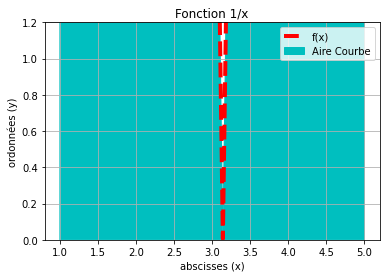

In [110]:
plt.grid()
plt.plot(np.linspace (borneA , borneB , 100) , functionSecond(np.linspace (borneA , borneB , 100)) ,"r--",linewidth= "4" ) # courbe trac ée en rouge
plt.xlabel("abscisses (x)") # mettre un nom à l’axe des abscisses
plt.ylabel("ordonnées (y)") # mettre un nom à l’axe des ordonn ées
plt.title("Fonction 1/x") # mettre un titre à la figure
plt.xlim(borneA-0.2,borneB+0.2)
plt.ylim(0,1.2)
plt.fill_between(np.linspace (borneA , borneB , 100),functionSecond(np.linspace (borneA , borneB , 100)),0,color='c')
plt.legend(["f(x)", "Aire Courbe"]) # donne une lé gende au graphique
plt.show()